# RBPj 10X analysis
## December 2021
## Yolanda Guillén

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sns
import scrublet as scr

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.2.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [5]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 
cmap2 = LinearSegmentedColormap.from_list(name='gene_cmap2', colors=['lightgrey', 'lavender', 'blue', 'darkblue']) 
sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.2 scipy==1.2.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [6]:
adata_WT = sc.read_10x_mtx(
    '/Users/yolanda_guillen/Desktop/IMIM/sc_RBPj/10X_output/A0023/filtered_features/',var_names='gene_symbols', cache=True)                
    # the directory with the `.mtx.gz` file
    # use gene symbols for the variable names (variables-axis index)
    # write a cache file f

... writing an h5ad cache file to speedup reading next time


In [79]:
adata_KO = sc.read_10x_mtx(
    '/Users/yolanda_guillen/Desktop/IMIM/sc_RBPj/10X_output/A0024/filtered_features/',var_names='gene_symbols', cache=True)

... writing an h5ad cache file to speedup reading next time


In [80]:
adata_WT
print(adata_WT)
adata_KO

AnnData object with n_obs × n_vars = 9728 × 1164 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'n_genes', 'percent_mito', 'n_counts', 'doublet_scores', 'predicted_doublets', 'louvain'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'pca', 'neighbors', 'louvain', 'louvain_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'


View of AnnData object with n_obs × n_vars = 4613 × 32285 
    var: 'gene_ids', 'feature_types'

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


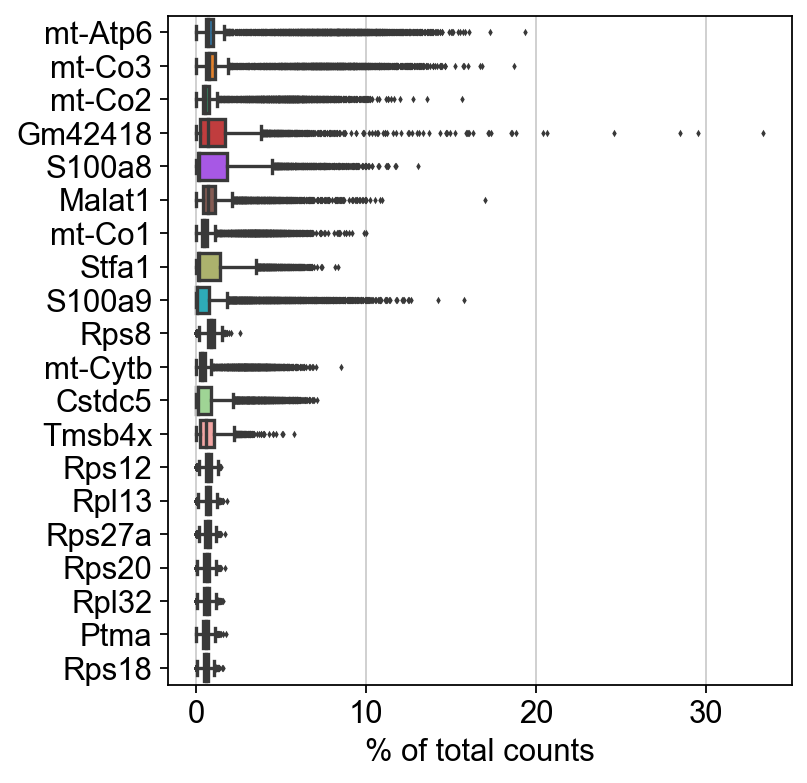

In [10]:
sc.pl.highest_expr_genes(adata_WT, n_top=20)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


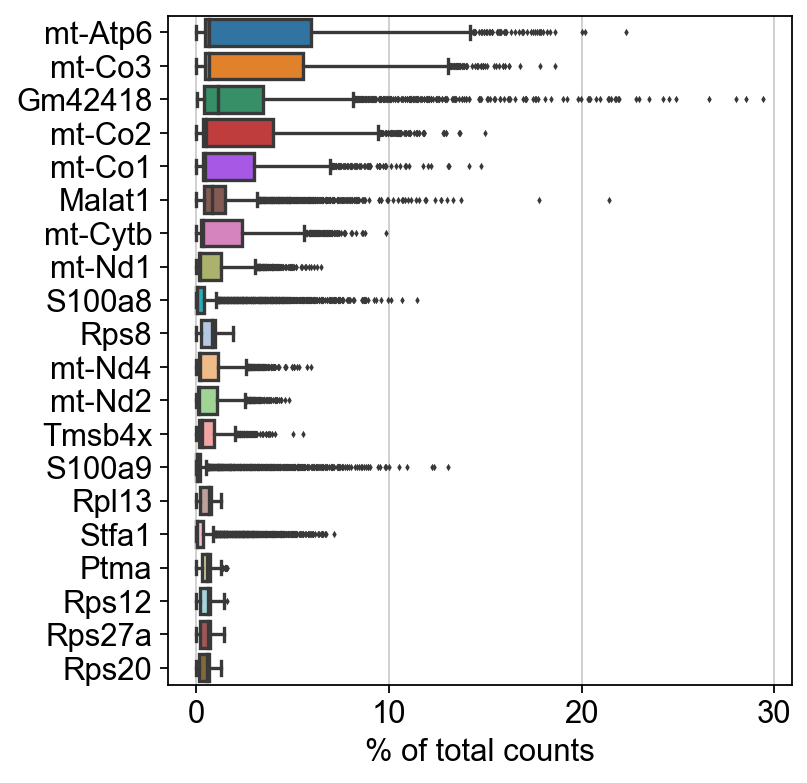

In [81]:
sc.pl.highest_expr_genes(adata_KO, n_top=20)

## QC

In [11]:
# Quality control metrics. If inplace = True, the output QC variables are added to adata.obs. If inplace = False,
# not included, only calculated and print.
sc.pp.calculate_qc_metrics(adata_WT,inplace=True,percent_top=[50])
# Output
# n_genes_by_counts = Number of genes expressed
# log1p_n_genes_by_counts = (logX + 1)
# total_counts = Sum of counts for a gene
# pct_counts_in_top_50_genes = cumulative percentage of counts for 50 most most expressed genes. If deprecated, it 
# pct_dropout_by_counts = percentage of cells this feature does not appear in.
# will estimate for a range of top genes.


Trying to set attribute `.obs` of view, making a copy.


In [83]:
sc.pp.calculate_qc_metrics(adata_KO,inplace=True,percent_top=[50])

Trying to set attribute `.obs` of view, making a copy.


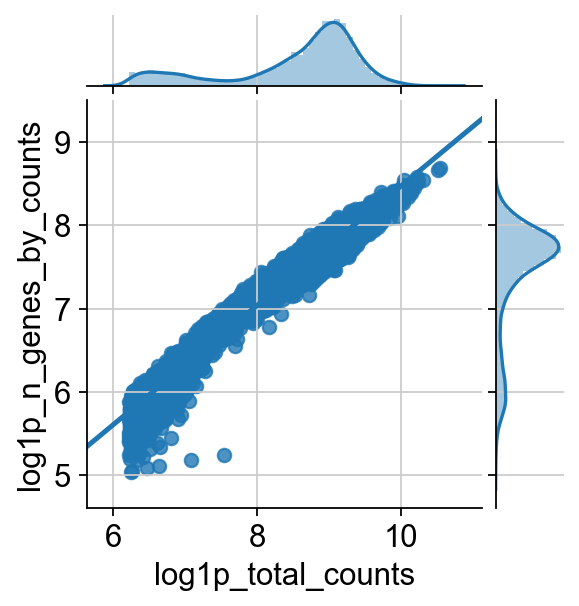

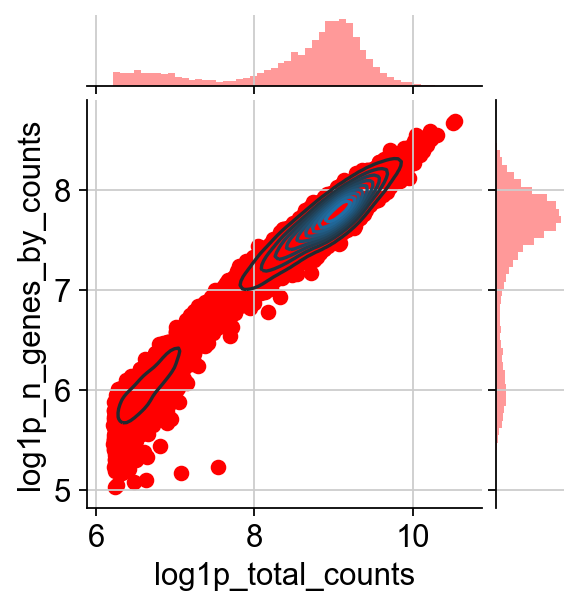

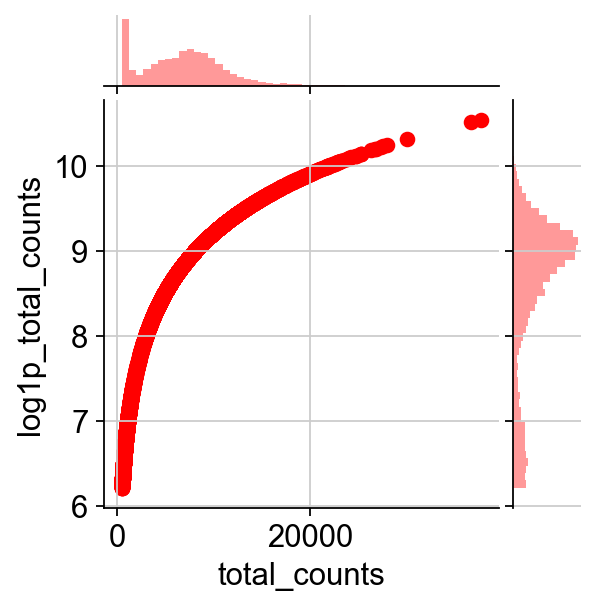

In [12]:
#print(adata.obs)
sns.jointplot("log1p_total_counts","log1p_n_genes_by_counts",
            data=adata_WT.obs,kind="reg",height=4)
sns.jointplot("log1p_total_counts","log1p_n_genes_by_counts",
            data=adata_WT.obs,color="red",height=4).plot_joint(sns.kdeplot)
sns.jointplot("total_counts","log1p_total_counts",
            data=adata_WT.obs,color="red",height=4)



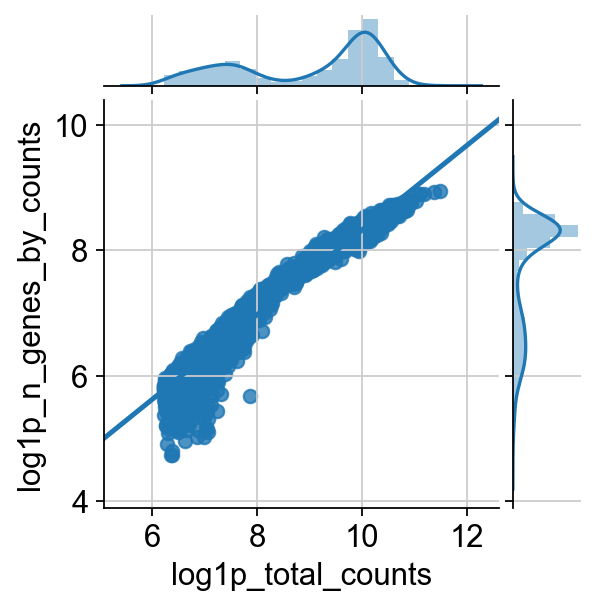

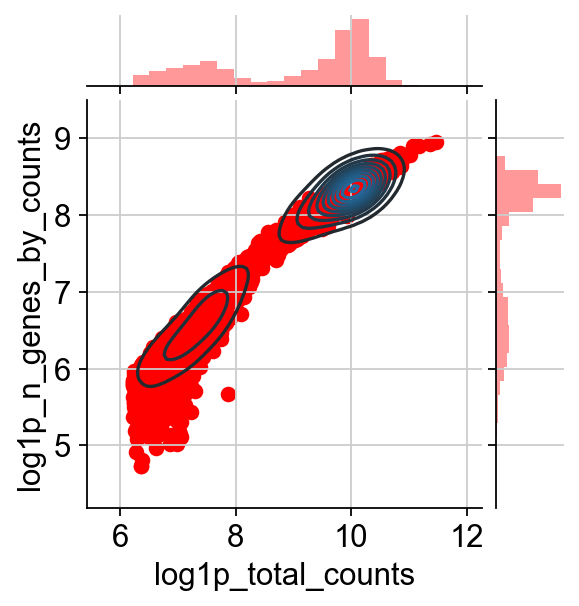

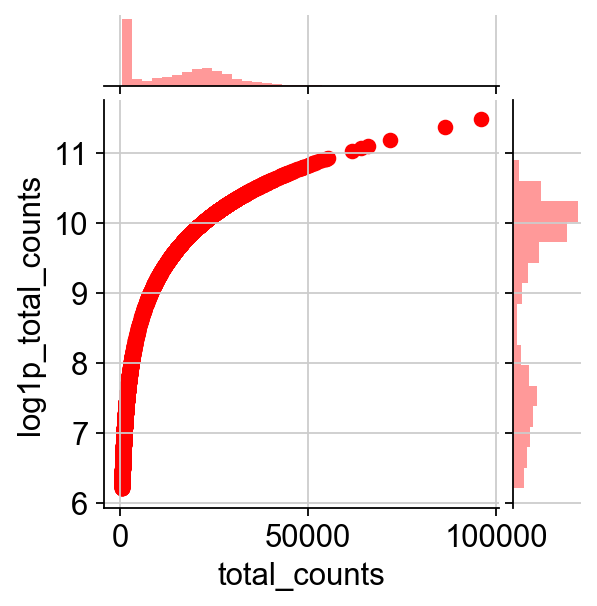

In [84]:
#print(adata.obs)
sns.jointplot("log1p_total_counts","log1p_n_genes_by_counts",
            data=adata_KO.obs,kind="reg",height=4)
sns.jointplot("log1p_total_counts","log1p_n_genes_by_counts",
            data=adata_KO.obs,color="red",height=4).plot_joint(sns.kdeplot)
sns.jointplot("total_counts","log1p_total_counts",
            data=adata_KO.obs,color="red",height=4)



In [85]:
adata_WT.obs['total_counts']
adata_KO.obs['total_counts']

0
AAACCCACAACGGTAG-1    27765.0
AAACCCACACACCTAA-1    25021.0
AAACCCATCAGCAATC-1      561.0
AAACGAAAGCCTTGAT-1    24568.0
AAACGAAAGGGCAGAG-1    25831.0
                       ...   
TTTGGAGGTTGGTGTT-1     1183.0
TTTGGTTAGCCTAGGA-1    10025.0
TTTGGTTTCCTACCAC-1    36752.0
TTTGTTGAGCAGGGAG-1    22246.0
TTTGTTGGTACTCAAC-1    29401.0
Name: total_counts, Length: 4613, dtype: float32

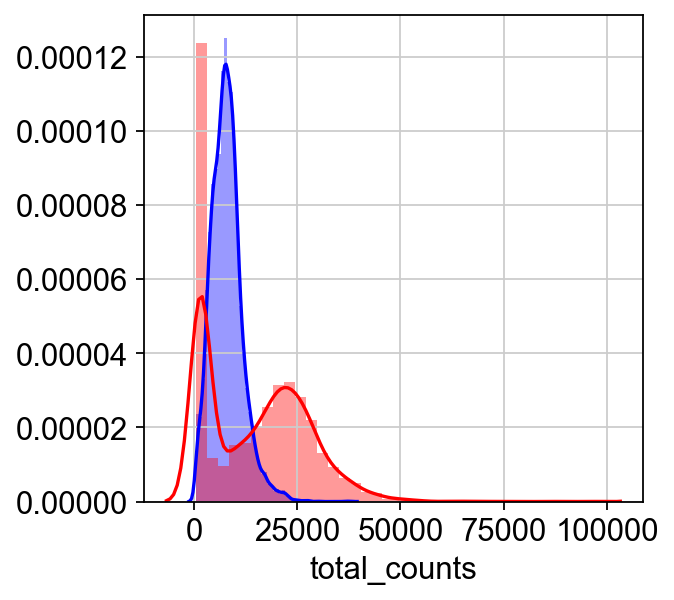

In [87]:
#sns.distplot(adata_Don.obs["total_counts"])
sns.distplot(adata_WT.obs["total_counts"],color="blue")
sns.distplot(adata_KO.obs["total_counts"],color="red")
#adata_Don.obs

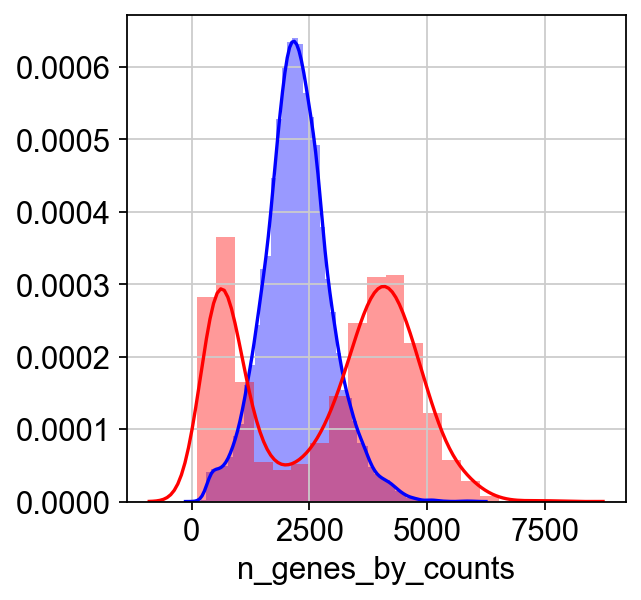

In [88]:
sns.distplot(adata_WT.obs["n_genes_by_counts"],color="blue")
sns.distplot(adata_KO.obs["n_genes_by_counts"],color="red")

In [16]:
# filter cells and genes here based on user preference
sc.pp.filter_cells(adata_WT, min_genes=100)
sc.pp.filter_genes(adata_WT, min_cells=1)

filtered out 13610 genes that are detectedin less than 1 cells


In [89]:
sc.pp.filter_cells(adata_KO, min_genes=50)
sc.pp.filter_genes(adata_KO, min_cells=1)

filtered out 13855 genes that are detectedin less than 1 cells


In [90]:
print(adata_WT.shape)
print(adata_KO.shape)

(9728, 1164)
(4613, 18430)


In [18]:
# look at mit contents
mito_genes = [name for name in adata_WT.var_names if name.startswith('mt-')]
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary, as X is sparse - it transform to a dense array after summing
adata_WT.obs['percent_mito'] = np.sum(
    adata_WT[:, mito_genes].X, axis=1).A1 / np.sum(adata_WT.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata_WT.obs['n_counts'] = adata_WT.X.sum(axis=1).A1

In [91]:
mito_genes = [name for name in adata_KO.var_names if name.startswith('mt-')]
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary, as X is sparse - it transform to a dense array after summing
adata_KO.obs['percent_mito'] = np.sum(
    adata_KO[:, mito_genes].X, axis=1).A1 / np.sum(adata_KO.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata_KO.obs['n_counts'] = adata_KO.X.sum(axis=1).A1

... storing 'feature_types' as categorical


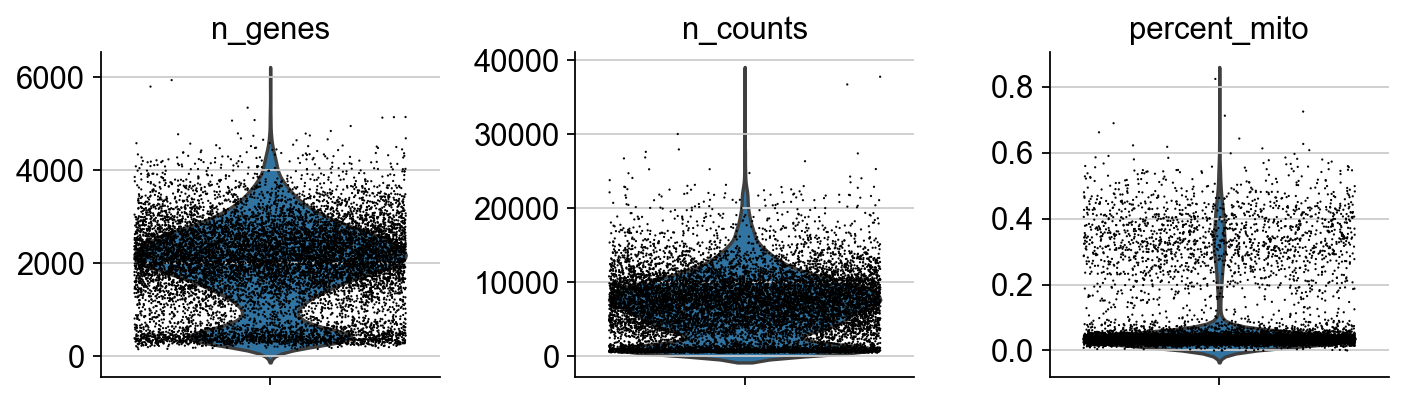

In [20]:
sc.pl.violin(adata_WT, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

... storing 'feature_types' as categorical


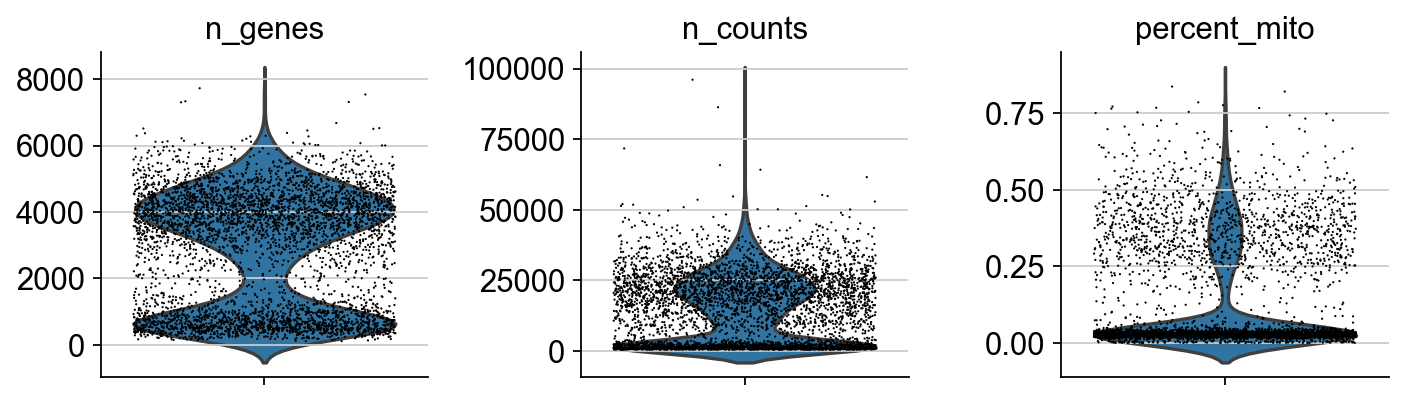

In [92]:
sc.pl.violin(adata_KO, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

In [93]:
adata_WT.obs.head(3)
adata_KO.obs.head(3)

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
0                                                                              
AAACCCACAACGGTAG-1               4549                 8.422883       27765.0   
AAACCCACACACCTAA-1               4003                 8.295049       25021.0   
AAACCCATCAGCAATC-1                207                 5.337538         561.0   

                    log1p_total_counts  pct_counts_in_top_50_genes  n_genes  \
0                                                                             
AAACCCACAACGGTAG-1           10.231567                   28.172159     4549   
AAACCCACACACCTAA-1           10.127511                   38.163942     4003   
AAACCCATCAGCAATC-1            6.331502                   72.014260      207   

                    percent_mito  n_counts  
0                                           
AAACCCACAACGGTAG-1      0.018044   27765.0  
AAACCCACACACCTAA-1      0.025978   25021.0  
AAACCCATCAGCAATC-1      0.470588     561.0

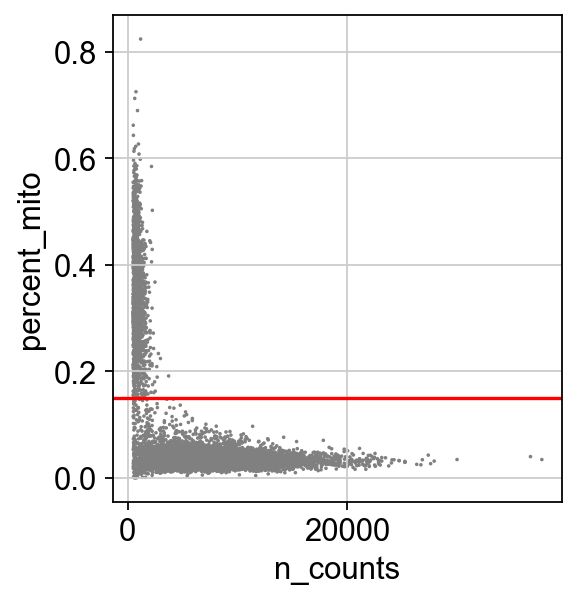

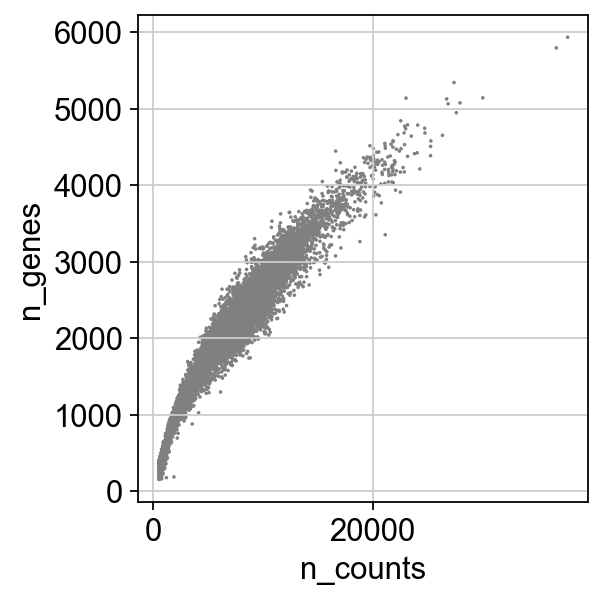

In [25]:
# mit percentage shows some dying cells, REMOVE them
ax = sc.pl.scatter(adata_WT, x='n_counts', y='percent_mito', show=False)
ax.axhline(y=0.15, c='red')
sc.pl.scatter(adata_WT, x='n_counts', y='n_genes')

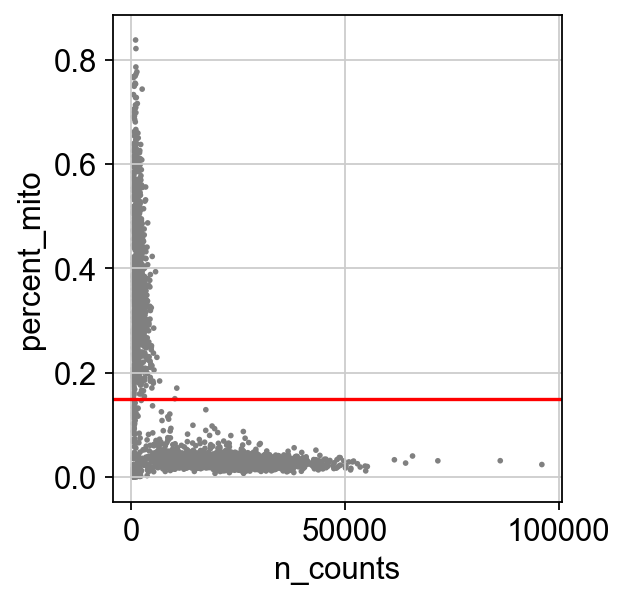

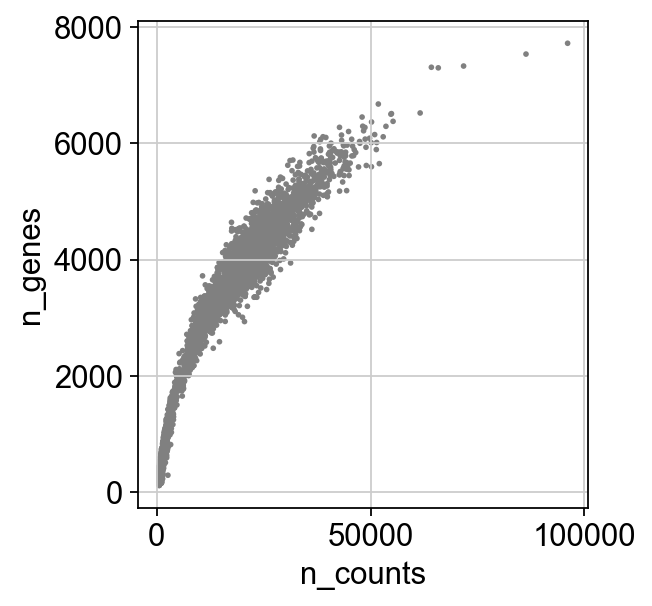

In [94]:
# mit percentage shows some dying cells, REMOVE them
ax = sc.pl.scatter(adata_KO, x='n_counts', y='percent_mito', show=False)
ax.axhline(y=0.15, c='red')
sc.pl.scatter(adata_KO, x='n_counts', y='n_genes')

In [26]:
# further QC with high mit percentage
adata_WT = adata_WT[adata_WT.obs['percent_mito'] < 0.15, :]
print(adata_WT.shape)

(9728, 18675)


In [95]:
# further QC with high mit percentage
adata_KO = adata_KO[adata_KO.obs['percent_mito'] < 0.15, :]
print(adata_KO.shape)

(3258, 18430)


In [28]:
# Then calculate the doublet score to remove potential doublets
scrub_WT=scr.Scrublet(adata_WT.X)
adata_WT.obs['doublet_scores'], adata_WT.obs['predicted_doublets'] = scrub_WT.scrub_doublets()


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Trying to set attribute `.obs` of view, making a copy.


Automatically set threshold at doublet score = 0.40
Detected doublet rate = 2.9%
Estimated detectable doublet fraction = 41.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.9%
Elapsed time: 19.3 seconds


In [96]:
# Then calculate the doublet score to remove potential doublets
scrub_KO=scr.Scrublet(adata_KO.X)
adata_KO.obs['doublet_scores'], adata_KO.obs['predicted_doublets'] = scrub_KO.scrub_doublets()

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...


Trying to set attribute `.obs` of view, making a copy.


Automatically set threshold at doublet score = 0.46
Detected doublet rate = 1.7%
Estimated detectable doublet fraction = 30.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 5.6%
Elapsed time: 6.7 seconds


In [ ]:
# Remove predicted doublets?

In [29]:
# normalisation
sc.pp.normalize_per_cell(adata_WT, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [97]:
# normalisation
sc.pp.normalize_per_cell(adata_KO, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [30]:
# log counts
sc.pp.log1p(adata_WT)

In [31]:
adata_WT.raw = adata_WT

In [98]:
adata_KO.raw = adata_KO

In [33]:
adata_WT.write('./write/scRBPj_lognorm_afterQC.h5ad')

In [99]:
adata_KO.write('./write/scRBPj_KO_lognorm_afterQC.h5ad')

In [34]:
# find highly variable genes
filter_result_WT = sc.pp.filter_genes_dispersion(
    adata_WT.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
print(sum(filter_result_WT.gene_subset))

extracting highly variable genes
    finished (0:00:02)
1164


In [100]:
# find highly variable genes
filter_result_KO = sc.pp.filter_genes_dispersion(
    adata_KO.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
print(sum(filter_result_KO.gene_subset))

extracting highly variable genes
    finished (0:00:01)
4733


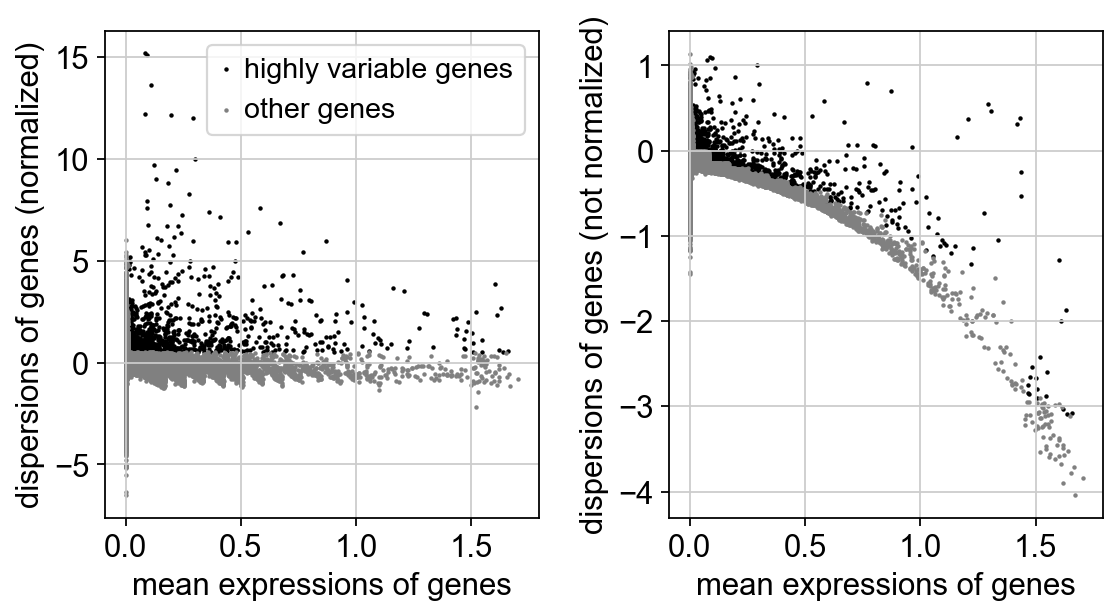

In [35]:
sc.pl.filter_genes_dispersion(filter_result_WT)

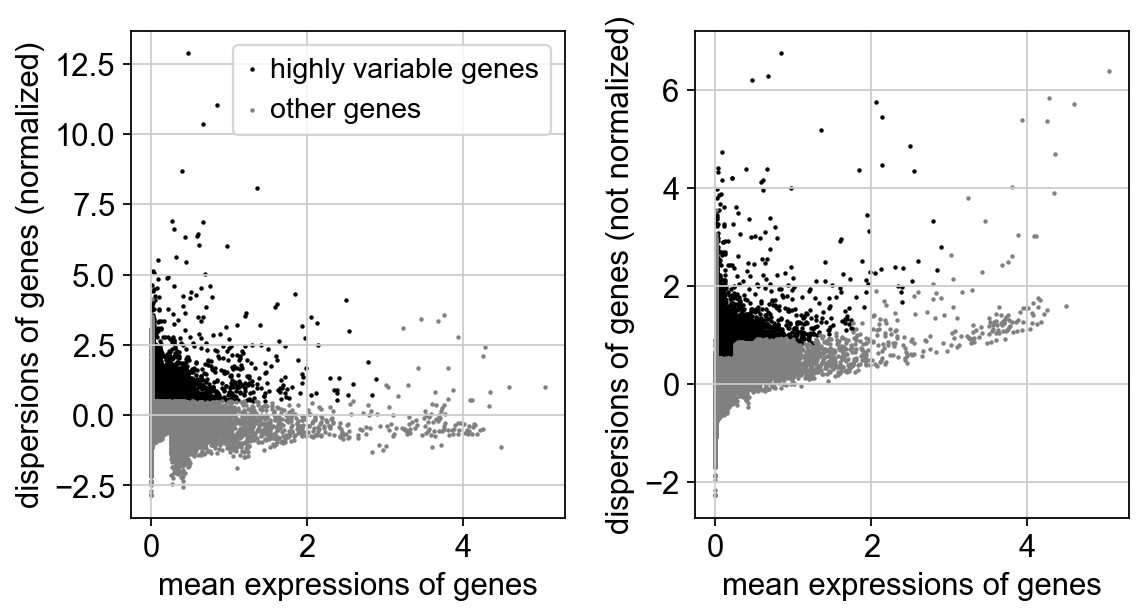

In [101]:
sc.pl.filter_genes_dispersion(filter_result_KO)

In [36]:
adata_WT = adata_WT[:, filter_result_WT.gene_subset]

In [102]:
adata_KO = adata_KO[:, filter_result_KO.gene_subset]

In [37]:
# remove effects of counts and mit percentage
sc.pp.regress_out(adata_WT, ['n_counts', 'percent_mito'])

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:00:11)


In [103]:
# remove effects of counts and mit percentage
sc.pp.regress_out(adata_KO, ['n_counts', 'percent_mito'])

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:00:22)


In [38]:
# scale for pca
sc.pp.scale(adata_WT)

In [104]:
sc.pp.scale(adata_KO)

## Visualisation

In [39]:
sc.tl.pca(adata_WT)

Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 50
    finished (0:00:00)


In [105]:
sc.tl.pca(adata_KO)

Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 50
    finished (0:00:00)


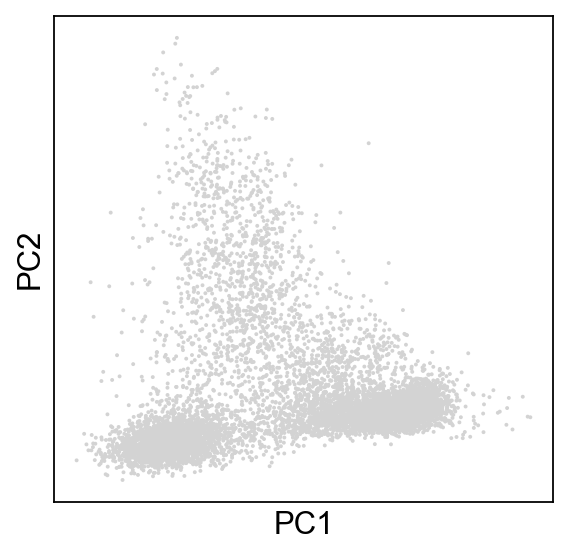

In [40]:
sc.pl.pca_scatter(adata_WT, wspace=0.3)

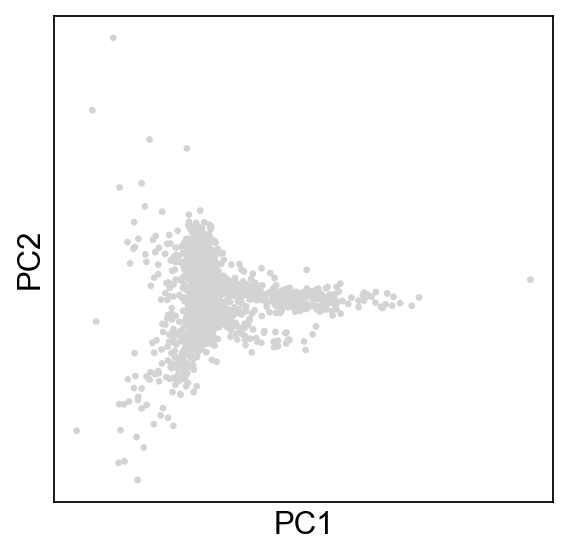

In [106]:
sc.pl.pca_scatter(adata_KO, wspace=0.3)

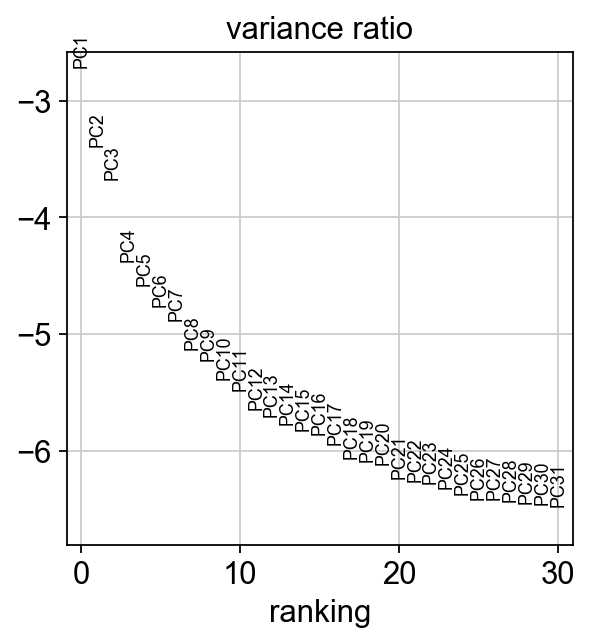

In [41]:
sc.pl.pca_variance_ratio(adata_WT, log=True)

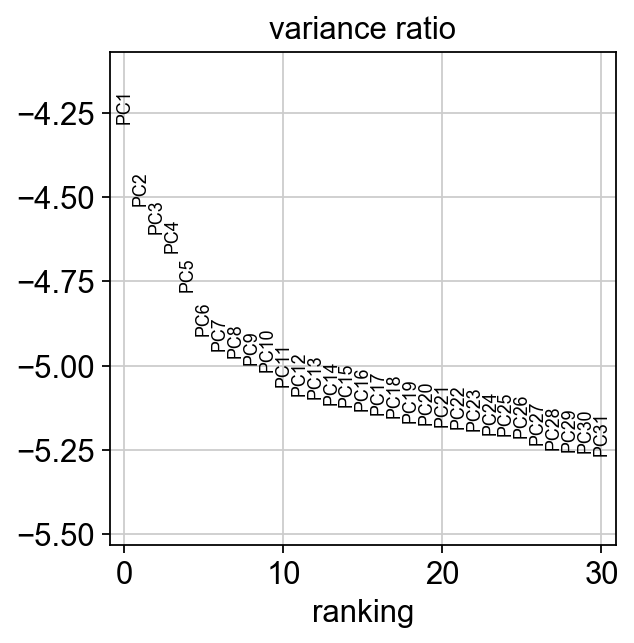

In [107]:
sc.pl.pca_variance_ratio(adata_KO, log=True)

In [42]:
sc.pp.neighbors(adata_WT, n_neighbors=10)

computing neighbors
    using 'X_pca' with n_pcs = 50


/Users/yolanda_guillen/miniconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/Users/yolanda_guillen/miniconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../miniconda3/lib/python3.7/site

    finished (0:00:06)


In [108]:
sc.pp.neighbors(adata_KO, n_neighbors=10)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:02)


In [43]:
sc.tl.umap(adata_WT)

computing UMAP
    finished (0:00:15)


In [109]:
sc.tl.umap(adata_KO)

computing UMAP
    finished (0:00:04)


In [110]:
adata_KO.obs

n_genes_by_counts  log1p_n_genes_by_counts  total_counts  \
0                                                                              
AAACCCACAACGGTAG-1               4549                 8.422883       27765.0   
AAACCCACACACCTAA-1               4003                 8.295049       25021.0   
AAACGAAAGCCTTGAT-1               4330                 8.373554       24568.0   
AAACGAAAGGGCAGAG-1               4299                 8.366370       25831.0   
AAACGAACAATTGCCA-1               3248                 8.086103       13657.0   
...                               ...                      ...           ...   
TTTGGAGAGCGTATAA-1               2923                 7.980708       10203.0   
TTTGGTTAGCCTAGGA-1               2715                 7.906915       10025.0   
TTTGGTTTCCTACCAC-1               5852                 8.674710       36752.0   
TTTGTTGAGCAGGGAG-1               3958                 8.283747       22246.0   
TTTGTTGGTACTCAAC-1               4602                 8.434464       29401.0   

                    log1p_total_counts  pct_counts_in_top_50_genes  n_genes  \
0                                                                             
AAACCCACAACGGTAG-1           10.231567                   28.172159     4549   
AAACCCACACACCTAA-1           10.127511                   38.163942     4003   
AAACGAAAGCCTTGAT-1           10.109241                   27.189840     4330   
AAACGAAAGGGCAGAG-1           10.159369                   29.913670     4299   
AAACGAACAATTGCCA-1            9.522080                   31.126895     3248   
...                                ...                         ...      ...   
TTTGGAGAGCGTATAA-1            9.230536                   32.157209     2923   
TTTGGTTAGCCTAGGA-1            9.212937                   29.236908     2715   
TTTGGTTTCCTACCAC-1           10.511975                   24.717022     5852   
TTTGTTGAGCAGGGAG-1           10.009962                   30.774072     3958   
TTTGTTGGTACTCAAC-1           10.288818                   27.288187     4602   

                    percent_mito  n_counts  doublet_scores  predicted_doublets  
0                                                                               
AAACCCACAACGGTAG-1      0.018044   27765.0        0.130785               False  
AAACCCACACACCTAA-1      0.025978   25021.0        0.179747               False  
AAACGAAAGCCTTGAT-1      0.015834   24568.0        0.118644               False  
AAACGAAAGGGCAGAG-1      0.038674   25831.0        0.066489               False  
AAACGAACAATTGCCA-1      0.026799   13657.0        0.103093               False  
...                          ...       ...             ...                 ...  
TTTGGAGAGCGTATAA-1      0.047633   10203.0        0.049369               False  
TTTGGTTAGCCTAGGA-1      0.040199   10025.0        0.021240               False  
TTTGGTTTCCTACCAC-1      0.013550   36752.0        0.066489               False  
TTTGTTGAGCAGGGAG-1      0.017441   22246.0        0.056098               False  
TTTGTTGGTACTCAAC-1      0.020612   29401.0        0.072423               False  

[3258 rows x 10 columns]

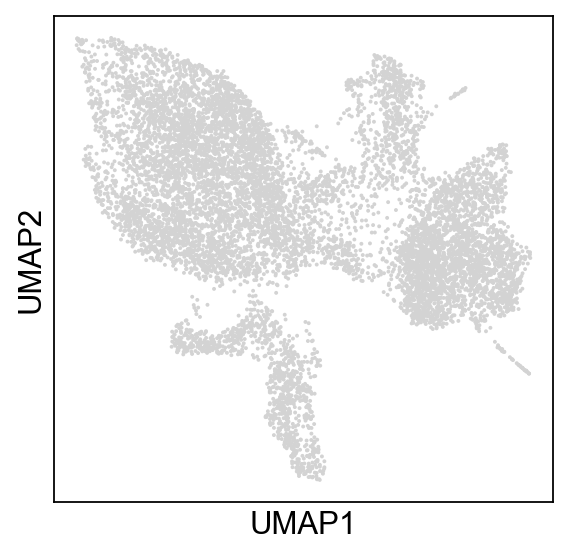

In [46]:
sc.pl.umap(adata_WT, wspace=0.5)

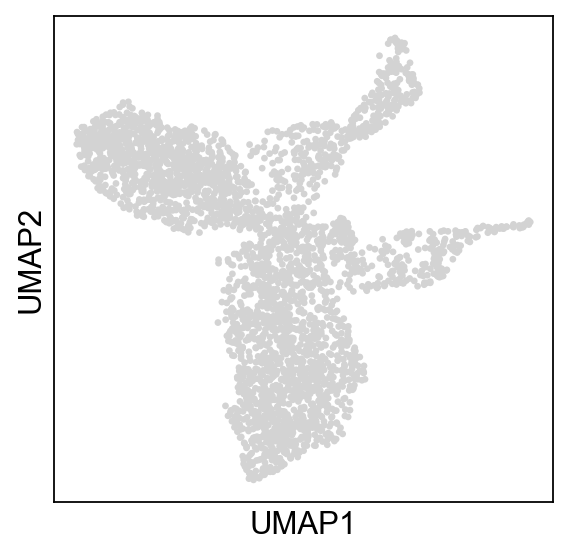

In [111]:
sc.pl.umap(adata_KO, wspace=0.5)

## Clustering

In [74]:
sc.tl.louvain(adata_WT, resolution = 0.5, random_state=0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:01)


In [112]:
sc.tl.louvain(adata_KO, resolution = 0.5, random_state=0)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)


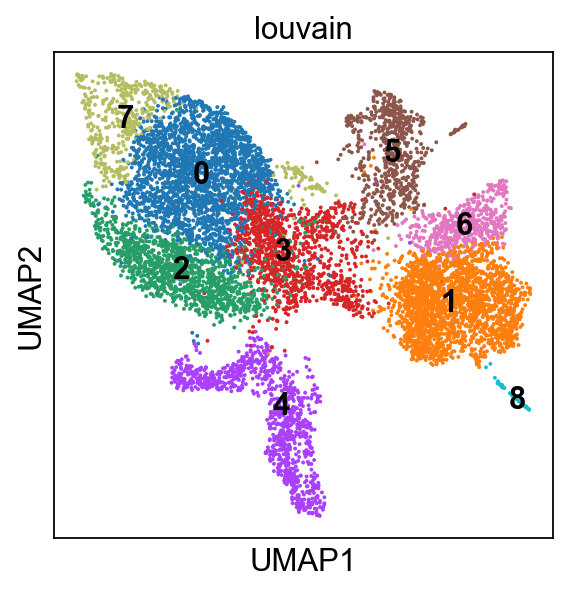

In [75]:
# still batch sees between conditions/days, needs to check whether this needs to be removed
# if Day0 R1 LK and Day0 R2 LK are biological replicates, that means the batch should not be removed
# otherwise, I will do a batch correction
sc.pl.umap(adata_WT, color=['louvain'], wspace=0.7, legend_loc='on data')

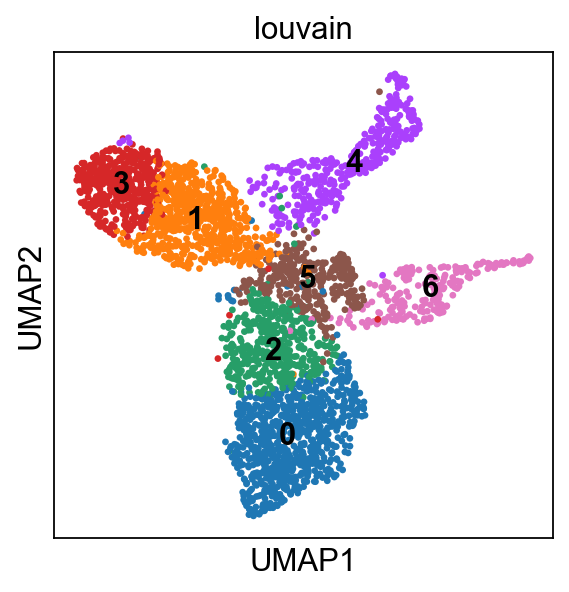

In [113]:
sc.pl.umap(adata_KO, color=['louvain'], wspace=0.7, legend_loc='on data')

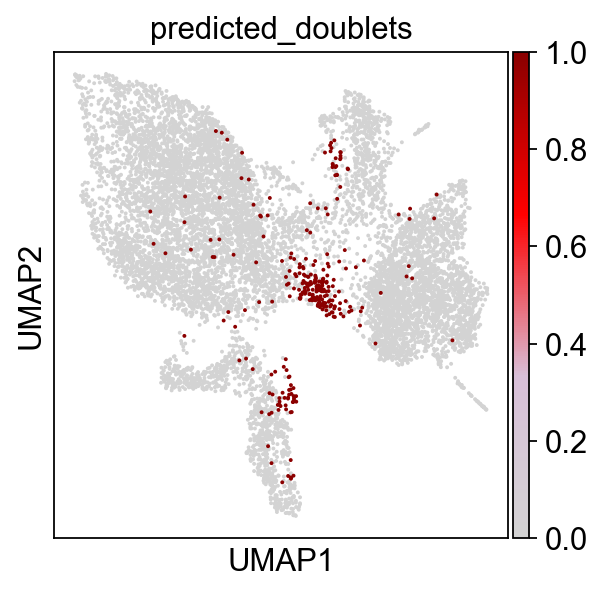

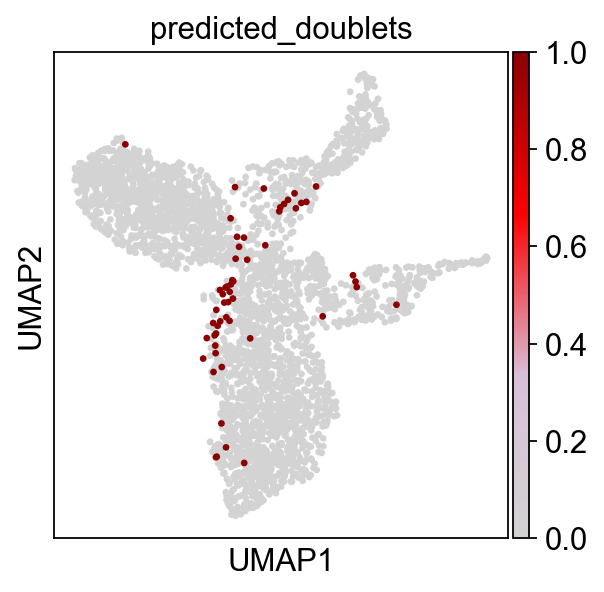

In [114]:
sc.pl.umap(adata_WT, color=['predicted_doublets'], color_map=cmap)
sc.pl.umap(adata_KO, color=['predicted_doublets'], color_map=cmap)

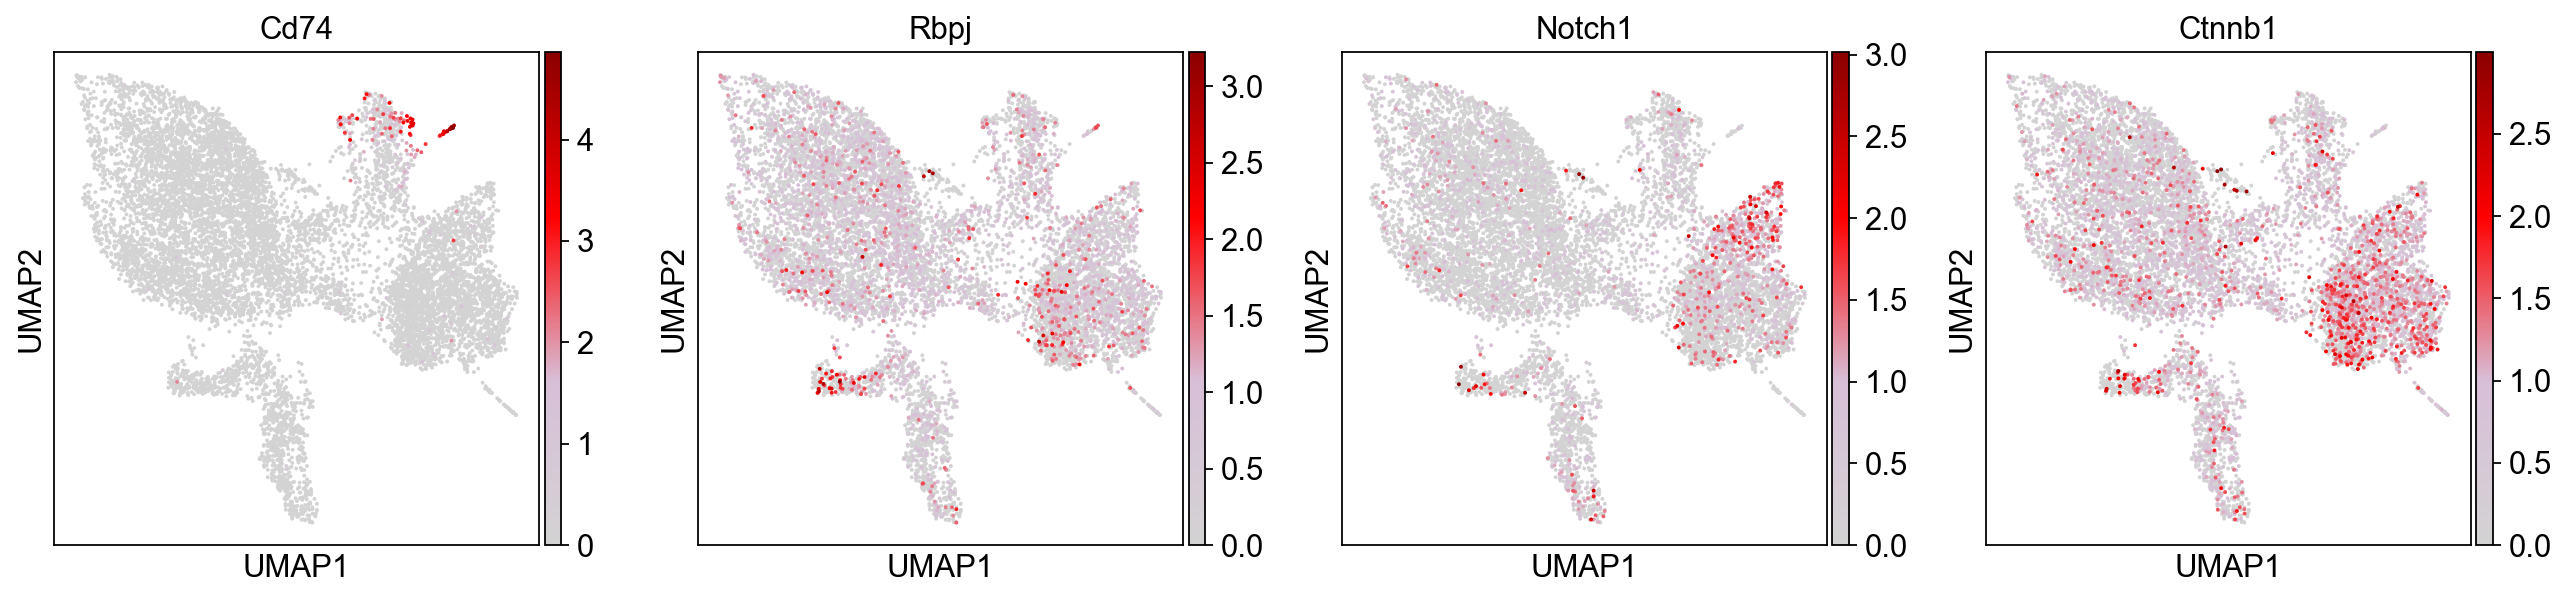

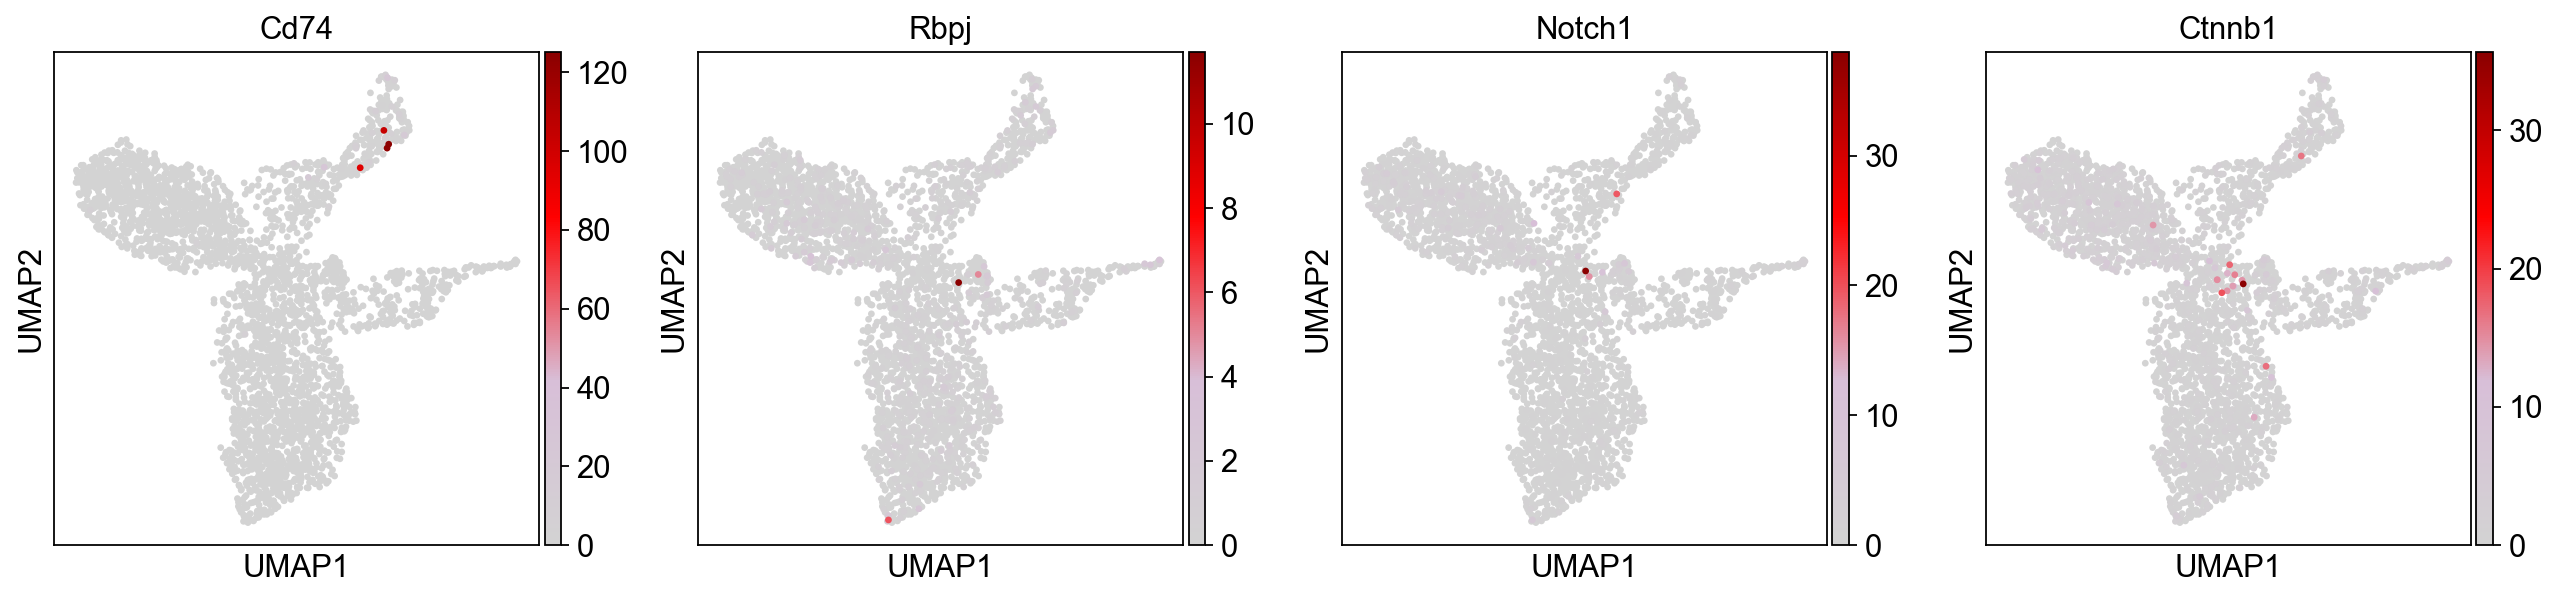

In [117]:
sc.pl.umap(adata_WT, color=['Cd74','Rbpj','Notch1','Ctnnb1'], color_map=cmap)
sc.pl.umap(adata_KO, color=['Cd74','Rbpj','Notch1','Ctnnb1'], color_map=cmap)

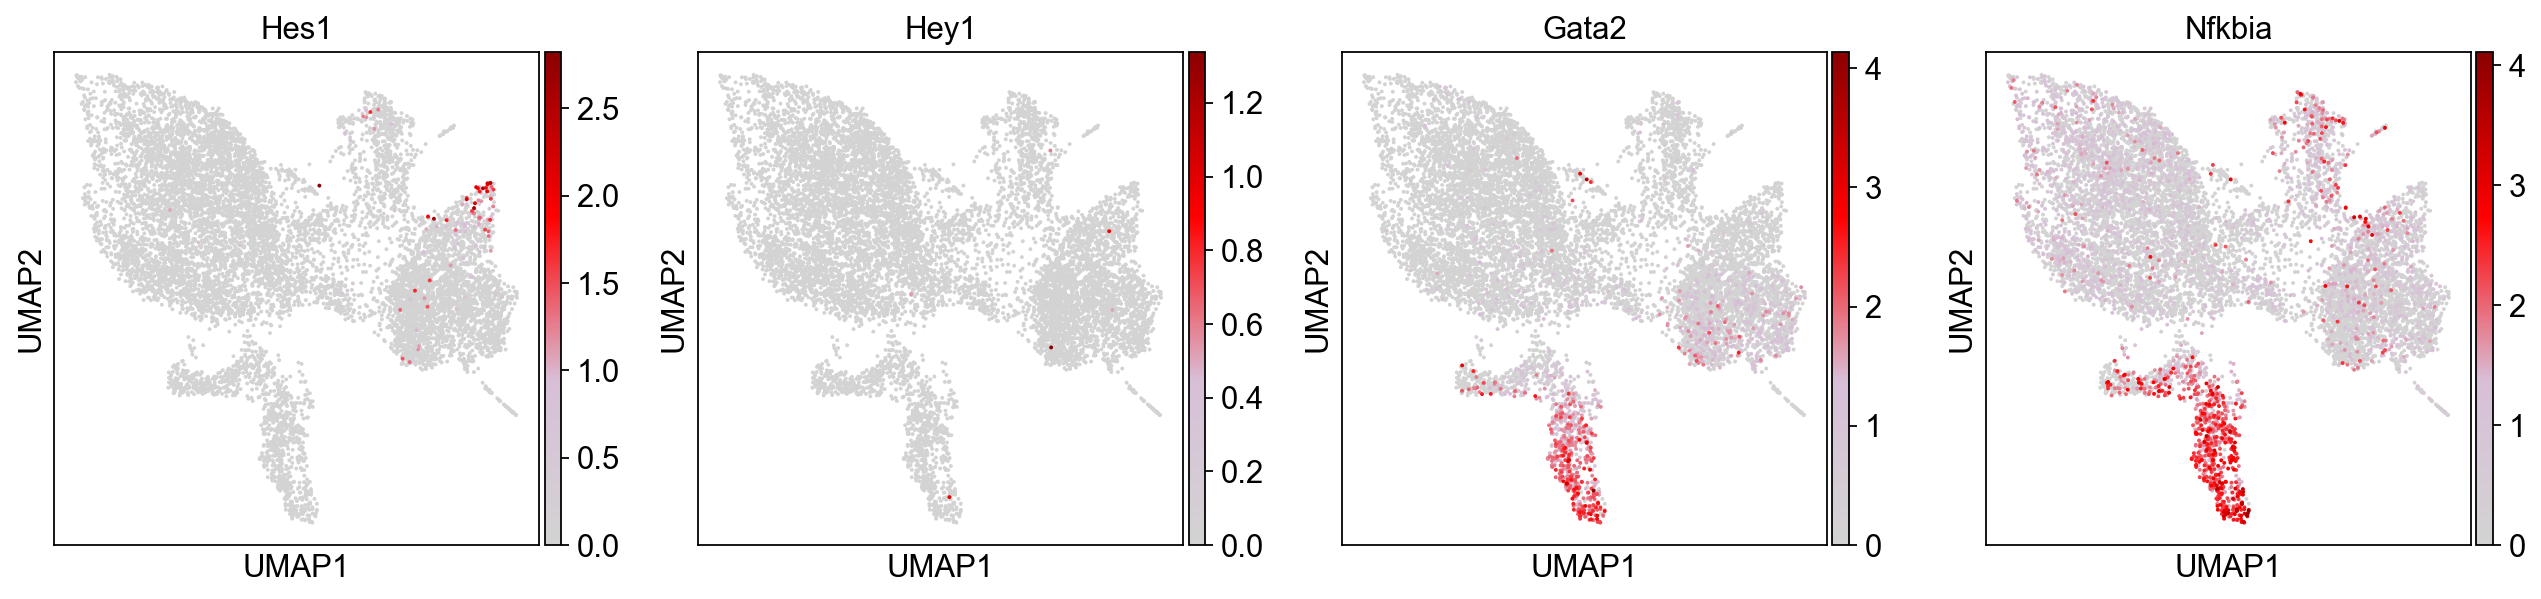

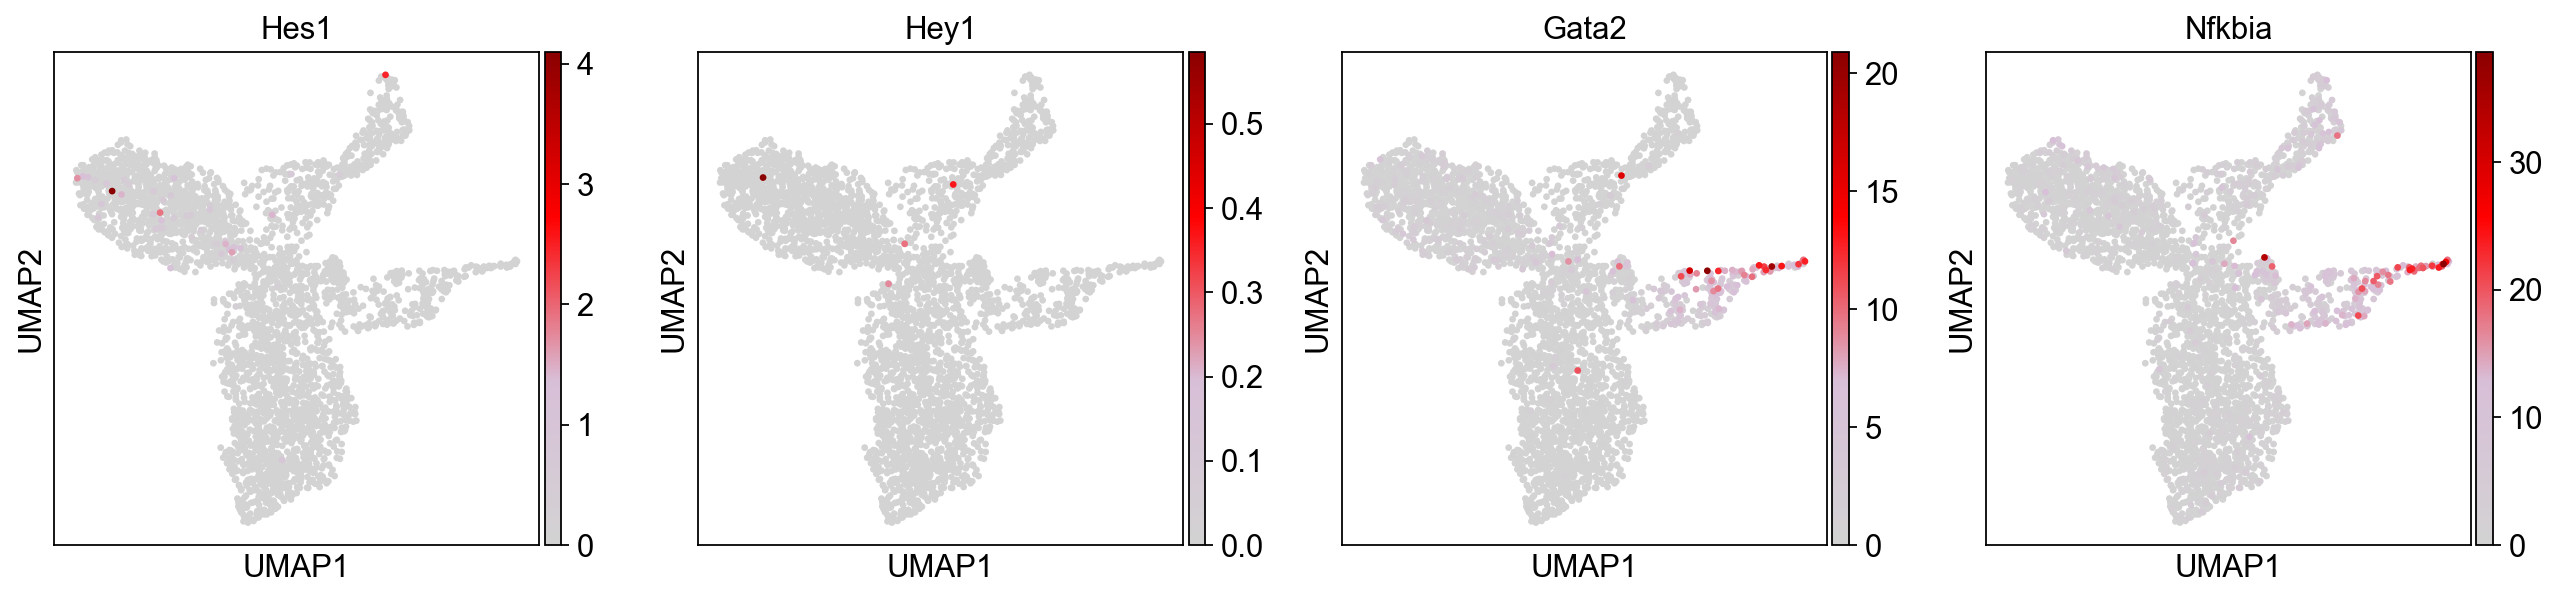

In [116]:
sc.pl.umap(adata_WT, color=['Hes1','Hey1','Gata2','Nfkbia'], color_map=cmap)
sc.pl.umap(adata_KO, color=['Hes1','Hey1','Gata2','Nfkbia'], color_map=cmap)

ranking genes
    finished (0:00:11)


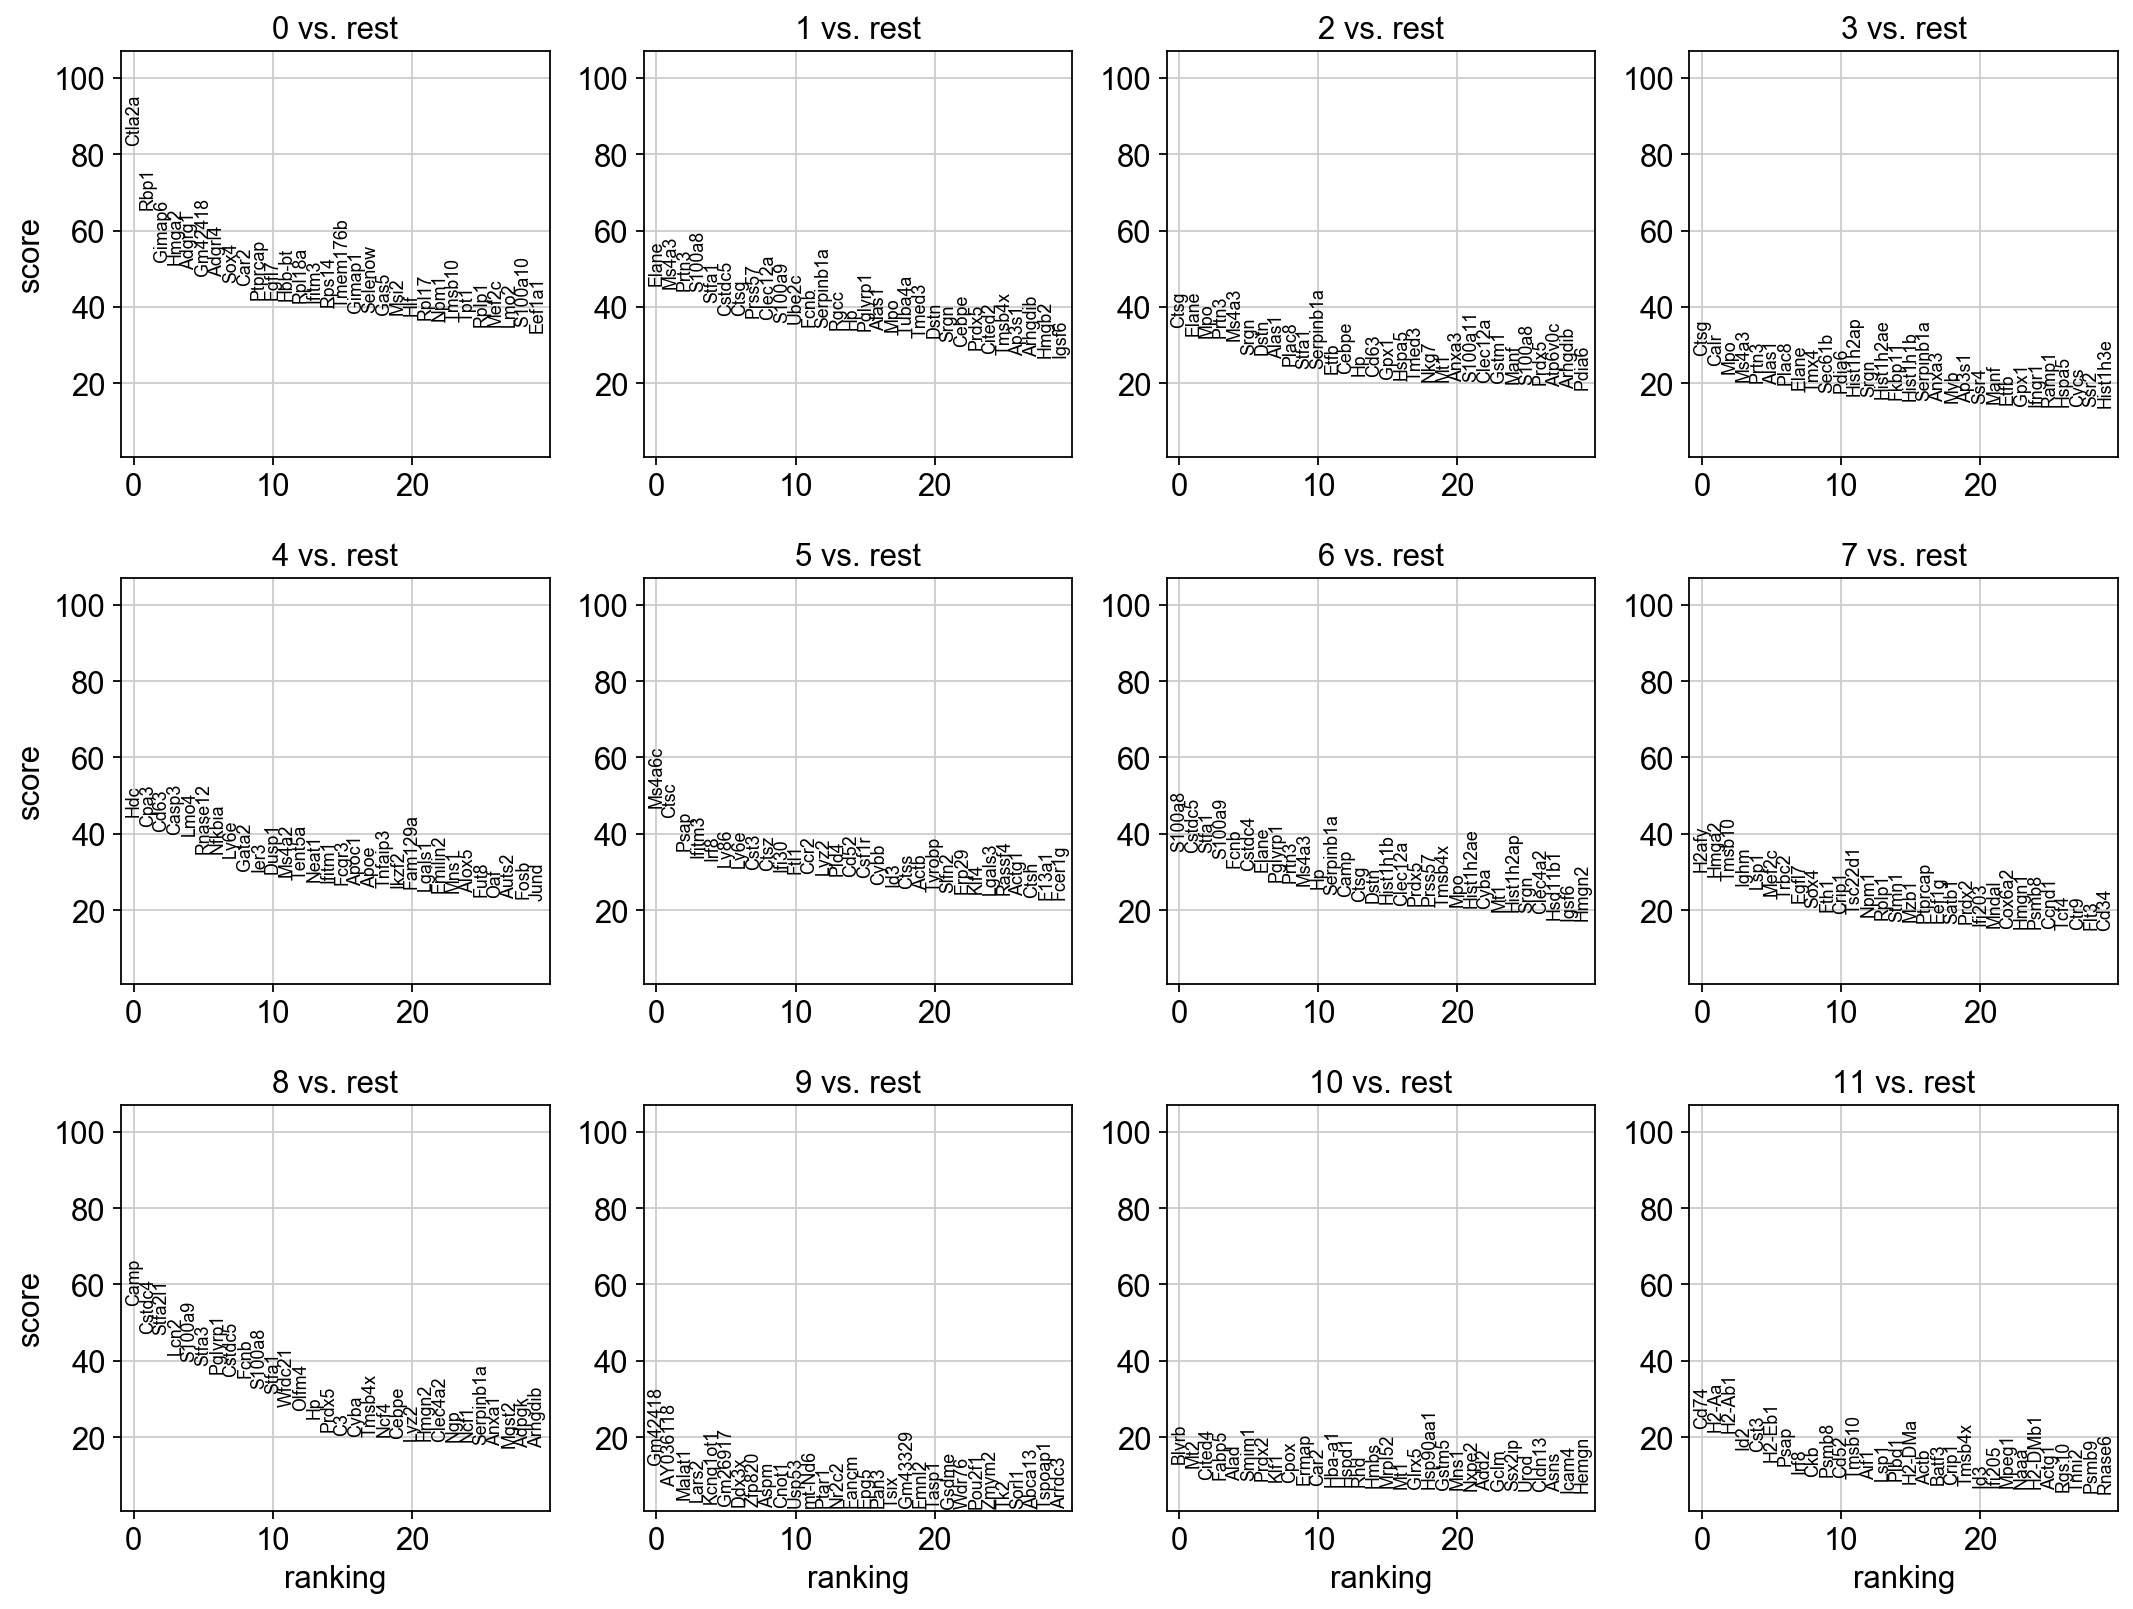

In [63]:
sc.tl.rank_genes_groups(adata_WT, 'louvain','wilcoxon',n_genes=500)
sc.pl.rank_genes_groups(adata_WT, n_genes=30,sharey=True)

In [77]:
degs_WT = adata_WT.uns['rank_genes_groups']
groups_WT = degs_WT['names'].dtype.names
dfdegs_WT = pd.DataFrame({group + '_' + key[:1]: degs_WT[key][group]
             for group in groups_WT for key in ['names','logfoldchanges','pvals_adj']})
print(dfdegs_WT)
#Print dataframe to csv file
export_csv = dfdegs_WT.to_csv ('/Users/yolanda_guillen/Desktop/IMIM/sc_RBPj/Results/DEGs_WT_clusters.csv',header=True,index = False) #Don't forget to add '.csv' at the end of the path

         0_n       0_l           0_p        1_n       1_l            1_p  \
0     Ctla2a  5.099146  0.000000e+00      Elane  3.355984  4.046736e-296   
1       Rbp1  5.324392  0.000000e+00      Ms4a3  2.539096  1.422944e-291   
2     Gimap6  4.144889  0.000000e+00      Prtn3  2.678580  1.993741e-277   
3      Hmga2  3.063015  0.000000e+00     S100a8  3.796085  1.499590e-295   
4     Adgrg1  3.042254  0.000000e+00      Stfa1  3.408914  7.614205e-264   
..       ...       ...           ...        ...       ...            ...   
495    Hbegf  2.646890  5.760497e-24    Slc48a1  0.572828   3.696280e-08   
496    Tfdp2  1.082860  4.464424e-24     Kcnip3  1.334462   4.076407e-08   
497     Eml4  0.744222  4.343449e-24      Vdac2  0.274606   4.285065e-08   
498  Zkscan1  1.468130  5.323811e-24       Cd37  0.429641   5.070088e-08   
499  Aldh7a1  1.452099  5.778507e-24  Hist1h2ap  0.326999   5.279880e-08   

               2_n       2_l            2_p     3_n  ...            8_p  \
0           

In [ ]:
adata.write('./write/US_B2_v1.h5ad')